In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = datasets.FashionMNIST("D:\git_projects\DataSets", download = False, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST("D:\git_projects\DataSets", download = False, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [4]:
images, labels = next(iter(trainloader))

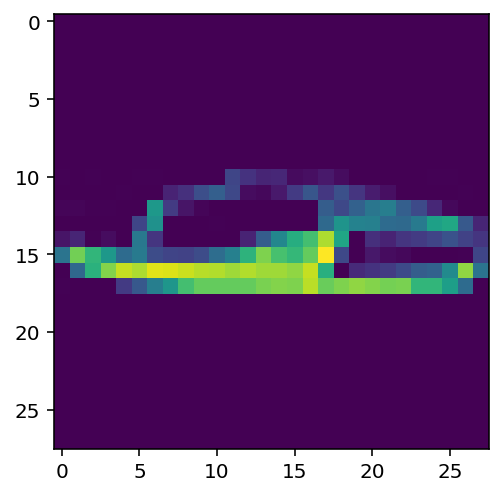

In [5]:
plt.imshow(images[6].view(28, 28))

In [6]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(p=0.1)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return F.log_softmax(x, dim = 1)

In [14]:
model = Network()

In [15]:
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [16]:
optimizer = optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.NLLLoss()

In [18]:
from tqdm import tqdm

In [19]:
EPOCHS = 10
train_errors = []
test_errors = []

for epoch in tqdm(range(EPOCHS)):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                ops = model(images)
                test_loss += criterion(ops, labels).item()
                ps = torch.exp(ops)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        train_errors.append(running_loss/len(trainloader))
        test_errors.append(test_loss/len(testloader))
        model.train()
        print(f"Epochs: {epoch+1}/{EPOCHS}",
              f"Train Loss: {train_errors[-1]}",
              f"Test Loss: {test_errors[-1]}",
              f"Accuracy: {accuracy/len(testloader)}")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Epochs: 1/10 Train Loss: 0.5359190877503169 Test Loss: 0.43234100662598945 Accuracy: 0.8412619233131409


 10%|████████▎                                                                          | 1/10 [00:46<06:57, 46.34s/it]

Epochs: 2/10 Train Loss: 0.39724691263012796 Test Loss: 0.38333844379254967 Accuracy: 0.8575835824012756


 20%|████████████████▌                                                                  | 2/10 [01:33<06:12, 46.55s/it]

Epochs: 3/10 Train Loss: 0.36164083160253474 Test Loss: 0.3744555028618141 Accuracy: 0.8654458522796631


 30%|████████████████████████▉                                                          | 3/10 [02:19<05:24, 46.42s/it]

Epochs: 4/10 Train Loss: 0.33799057793038995 Test Loss: 0.38488700283560784 Accuracy: 0.8547969460487366


 40%|█████████████████████████████████▏                                                 | 4/10 [03:05<04:37, 46.19s/it]

Epochs: 5/10 Train Loss: 0.3200338283406773 Test Loss: 0.35146037024107707 Accuracy: 0.8738057613372803


 50%|█████████████████████████████████████████▌                                         | 5/10 [03:50<03:49, 45.96s/it]

Epochs: 6/10 Train Loss: 0.305859874441489 Test Loss: 0.3692050796880084 Accuracy: 0.8674362897872925


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [04:35<03:03, 45.76s/it]

Epochs: 7/10 Train Loss: 0.294635691137901 Test Loss: 0.33554726616022695 Accuracy: 0.8754976391792297


 70%|██████████████████████████████████████████████████████████                         | 7/10 [05:21<02:16, 45.58s/it]

Epochs: 8/10 Train Loss: 0.2828747229313037 Test Loss: 0.34724601600200505 Accuracy: 0.875199019908905


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [06:06<01:31, 45.53s/it]

Epochs: 9/10 Train Loss: 0.27419499637110273 Test Loss: 0.33993869564335816 Accuracy: 0.8768908977508545


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [06:51<00:45, 45.37s/it]

Epochs: 10/10 Train Loss: 0.266488046049754 Test Loss: 0.33445648028022923 Accuracy: 0.8787818551063538


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [07:36<00:00, 45.64s/it]


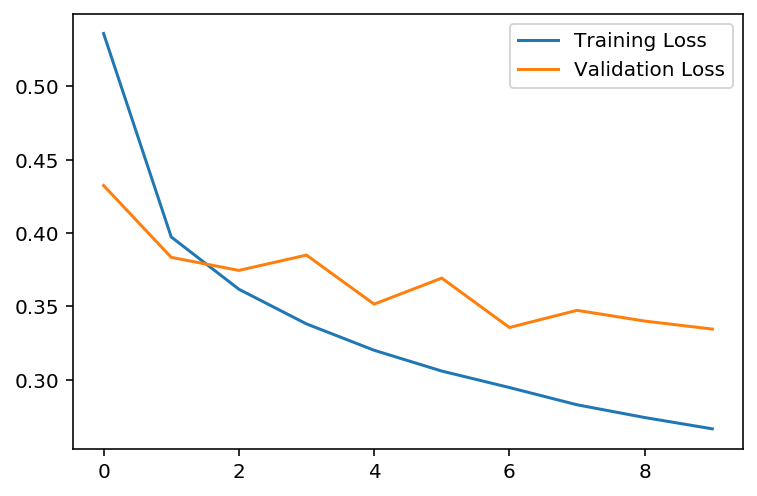

In [22]:
plt.plot(train_errors, label = "Training Loss")
plt.plot(test_errors, label = "Validation Loss")
plt.legend()

In [23]:
import helper


model.eval()

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [24]:
images, labels = next(iter(testloader))

In [47]:
inp = images[8]

In [48]:
with torch.no_grad():
    op = model(inp)

In [49]:
op_prob = torch.exp(op)

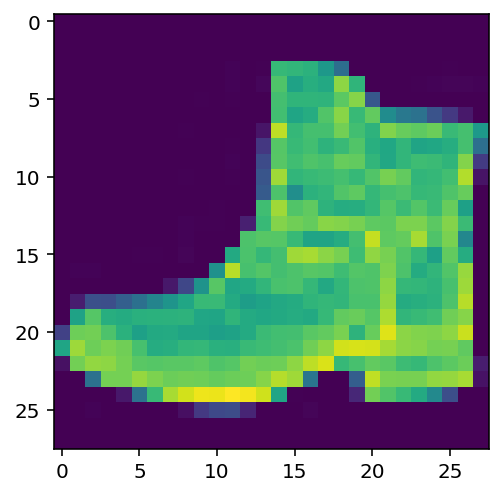

In [50]:
plt.imshow(inp.view(28, 28))

In [51]:
torch.argmax(op_prob)

tensor(9)

In [52]:
labels[8]

tensor(9)

In [37]:
import numpy as np
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

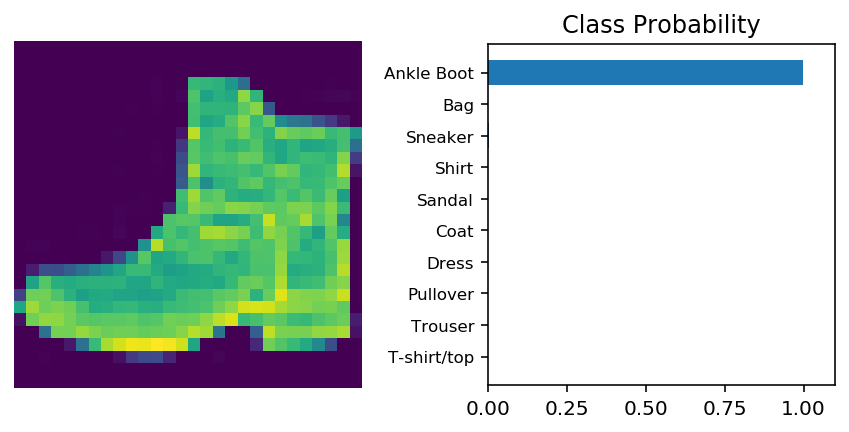

In [53]:
view_classify(inp, op_prob)